# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [2]:
tk = th.Thicket.from_caliperreader(glob("*.cali"))

In [3]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                       profile                           
{'name': 'main', 'type': 'function'}       55101534       1  regionprofile   
                                           100201556      1  regionprofile   
                                           295277911      1  regionprofile   
                                           339702170      1  regionprofile   
                                           345760193      1  regionprofile   
                                           354404808      1  regionprofile   
                                           393780550      1  regionprofile   
                                           569294909      1  regionprofile   
                                           617782299      1  regionprofile   
                                           665975200      1  regionprofile   
                                           708127808      1  regionprofile   
                                           1205757524     1  regionprofile   
                                           1430116159     1  regionprofile   
                                           1693159416     1  regionprofile   
                                           1793904175     1  regionprofile   
                                           1806359314     1  regionprofile   
                                           1888941488     1  regionprofile   
                                           2117395504     1  regionprofile   
                                           2453213632     1  regionprofile   
                                           2595802016     1  regionprofile   
                                           2847255854     1  regionprofile   
                                           3070276550     1  regionprofile   
                                           3437183686     1  regionprofile   
                                           3506142139     1  regionprofile   
                                           3784026123     1  regionprofile   
                                           4288681425     1  regionprofile   
                                           4294640006     1  regionprofile   
{'name': 'comm', 'type': 'function'}       55101534       3  regionprofile   
                                           100201556      3  regionprofile   
                                           295277911      3  regionprofile   
                                           339702170      3  regionprofile   
                                           345760193      3  regionprofile   
                                           354404808      3  regionprofile   
                                           393780550      3  regionprofile   
                                           569294909      3  regionprofile   
                                           617782299      3  regionprofile   
                                           665975200      3  regionprofile   
                                           708127808      3  regionprofile   
                                           1205757524     3  regionprofile   
                                           1430116159     3  regionprofile   
                                           1693159416     3  regionprofile   
                                           1793904175     3  regionprofile   
                                           1806359314     3  regionprofile   
                                           1888941488     3  regionprofile   
                                           2117395504     3  regionprofile   
                                           2453213632     3  regionprofile   
                                           2595802016     3  regionprofile   
                                           2847255854     3  regionprofile   
                                           3070276550     3  regionprofile   
                                           3437183686     3  regionprofile   


Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [4]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
55101534,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p1-a4194304.cali,true,1701228509,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 4194304]",c,BitonicSort,MPI,int,4,4194304,Random,1,4,Online
100201556,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a1048576.cali,true,1700510848,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 1048576]",c,BitonicSort,MPI,int,4,1048576,Random,16,4,Online
295277911,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a65536.cali,true,1700510485,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 65536]",c,BitonicSort,MPI,int,4,65536,Random,64,4,Online
339702170,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a262144.cali,true,1700510545,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,Random,32,4,Online
345760193,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a262144.cali,true,1700510545,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,Random,8,4,Online
354404808,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a4194304.cali,true,1700510878,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 4194304]",c,BitonicSort,MPI,int,4,4194304,Random,2,4,Online
393780550,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a1048576.cali,true,1700510845,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 1048576]",c,BitonicSort,MPI,int,4,1048576,Random,4,4,Online
569294909,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a262144.cali,true,1700510545,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,Random,64,4,Online
617782299,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a65536.cali,true,1700510464,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 65536]",c,BitonicSort,MPI,int,4,65536,Random,2,4,Online


In [5]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  ├─ \x1b1.000\x1b comm_large\x1b\n│  │  ├─ \x1b1.000\x1b MPI_Recv_1\x1b\n│  │  ├─ \x1b1.000\x1b MPI_Recv_2\x1b\n│  │  ├─ \x1b1.000\x1b MPI_Send_1\x1b\n│  │  └─ \x1b1.000\x1b MPI_Send_2\x1b\n│  ├─ \x1b1.000\x1b comp_large\x1b\n│  └─ \x1b1.000\x1b memcpy_1\x1b\n├─ \x1b1.000\x1b comp_small\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [6]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  │  ├─ 1.000 MPI_Recv_1
│  │  ├─ 1.000 MPI_Recv_2
│  │  ├─ 1.000 MPI_Send_1
│  │  └─ 1.000 MPI_Send_2
│  ├─ 1.000 comp_large
│  └─ 1.000 memcpy_1
├─ 1.000 comp_small
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [7]:
gb = tk.groupby("InputSize")

4  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b8a9ec6e700>, 262144: <thicket.thicket.Thicket object at 0x2b8a9ecfa370>, 1048576: <thicket.thicket.Thicket object at 0x2b8a9ebfc400>, 4194304: <thicket.thicket.Thicket object at 0x2b8a9ebe55e0>}


In [8]:
print(gb)

{65536: <thicket.thicket.Thicket object at 0x2b8a9ec6e700>, 262144: <thicket.thicket.Thicket object at 0x2b8a9ecfa370>, 1048576: <thicket.thicket.Thicket object at 0x2b8a9ebfc400>, 4194304: <thicket.thicket.Thicket object at 0x2b8a9ebe55e0>}


In [9]:
print(gb.values())


dict_values([<thicket.thicket.Thicket object at 0x2b8a9ec6e700>, <thicket.thicket.Thicket object at 0x2b8a9ecfa370>, <thicket.thicket.Thicket object at 0x2b8a9ebfc400>, <thicket.thicket.Thicket object at 0x2b8a9ebe55e0>])


Compose these 3 groups column-wise to get a holistic view of the data

In [10]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [25]:
ctk.dataframe

,index,name,num_procs,65536,262144,1048576,4194304
,,,,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
0,0,main,1,0.276869,0.279950,0.283464,0.371513
1,1,main,2,0.296116,0.390218,0.784919,2.494643
2,2,main,4,0.397319,0.524094,1.132858,3.676469
3,3,main,8,0.541295,0.721027,1.587328,5.375710
4,4,main,16,0.826520,1.126467,2.283063,7.724570
5,5,main,32,1.539997,1.872272,3.496874,10.944460
6,6,comm,1,0.000018,0.000032,0.000431,0.000429
7,7,comm,2,0.025495,0.110501,0.481867,2.122174
8,8,comm,4,0.039829,0.162120,0.726814,3.196387


In [12]:
ctk.dataframe = ctk.dataframe.dropna()

Perform pandas operations to get the table in a desirable format for plotting

In [13]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [14]:
# Drop unwanted columns
# ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (65536, "nid"), (65536, "nid")], axis=1)

# ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
# ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)
# Rename index to remove tuple
# ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
# # Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [15]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [16]:
ctk.dataframe = ctk.dataframe.dropna()

In [18]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank")], axis=1)

In [19]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank")], axis=1)

In [20]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Variance time/rank"), (262144, "Variance time/rank"), (1048576, "Variance time/rank"), (4194304, "Variance time/rank")], axis=1)

In [23]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [24]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Total time"), (262144, "Total time"), (1048576, "Total time"), (4194304, "Total time")], axis=1)

In [26]:
ctk.dataframe = ctk.dataframe.drop(['index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [27]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [28]:
ctk.dataframe

65536        262144       1048576       4194304
                     Avg time/rank Avg time/rank Avg time/rank Avg time/rank
name       num_procs                                                        
main       1              0.276869      0.279950      0.283464      0.371513
           2              0.296116      0.390218      0.784919      2.494643
           4              0.397319      0.524094      1.132858      3.676469
           8              0.541295      0.721027      1.587328      5.375710
           16             0.826520      1.126467      2.283063      7.724570
           32             1.539997      1.872272      3.496874     10.944460
comm       1              0.000018      0.000032      0.000431      0.000429
           2              0.025495      0.110501      0.481867      2.122174
           4              0.039829      0.162120      0.726814      3.196387
           8              0.056513      0.235607      1.054397      4.776204
           16             0.083210      0.336974      1.487536      6.850964
           32             0.152787      0.516288      2.155254      9.457534
comm_large 2              0.000997      0.002151      0.003939      0.013538
           4              0.004117      0.003863      0.026238      0.065298
           8              0.003742      0.006112      0.028272      0.102338
           16             0.008148      0.011356      0.037476      0.277701
           32             0.051167      0.058573      0.104924      0.339058
MPI_Recv_1 2              0.000825      0.001842      0.001387      0.008668
           4              0.002954      0.001854      0.003649      0.046262
           8              0.001400      0.002287      0.016054      0.050640
           16             0.004139      0.004204      0.012983      0.062313
           32             0.024883      0.025160      0.030136      0.074983
MPI_Recv_2 2              0.000835      0.001431      0.002951      0.006864
           4              0.002147      0.001931      0.027092      0.019312
           8              0.002429      0.002877      0.009040      0.036748
           16             0.003965      0.005042      0.016155      0.192480
           32             0.027143      0.030983      0.059040      0.206512
MPI_Send_1 2              0.000221      0.000757      0.002856      0.006168
           4              0.000207      0.000674      0.002184      0.012973
           8              0.000225      0.000927      0.004045      0.017214
           16             0.000266      0.001484      0.005900      0.023352
           32             0.000344      0.002246      0.011537      0.041328
MPI_Send_2 2              0.000062      0.000190      0.000620      0.005293
           4              0.000103      0.000605      0.001945      0.008397
           8              0.000116      0.000763      0.003027      0.012156
           16             0.000165      0.001190      0.004683      0.017718
           32             0.000232      0.001746      0.007118      0.026615
comp_large 2              0.024192      0.107235      0.474658      2.097691
           4              0.035265      0.156548      0.694039      3.106574
           8              0.052227      0.226809      1.015081      4.626895
           16             0.074342      0.321191      1.429393      6.494919
           32             0.100521      0.447413      2.003059      8.950983
memcpy_1   2              0.000030      0.000171      0.000763      0.004111
           4              0.000078      0.000452      0.002381      0.010628
           8              0.000139      0.000901      0.004834      0.022038
           16             0.000223      0.001820      0.009857      0.037828
           32             0.000340      0.005197      0.023769      0.083701
comp_small 1              0.000217      0.000711      0.001545      0.004223
           2              0.000245      0.001123      0.003404      0.009516
           4             

In [29]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [41]:
# df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1

# df_1 = ctk.dataframe.loc[:,(65536)] # all rows 1 column
# df_1

df_1 = ctk.dataframe.loc['main'] # all rows 1 column
# df_1 = ctk.dataframe
df_1

# df_1 = df_1.loc[]

# df_2 = df_1.loc[[64,128,256,512]]
# df_2

# df_1 = ctk.dataframe.loc['main'] # all columns 1 row


# df_2 =  ctk.dataframe.reset_index().drop([(262144),(1048576),(4194304)], axis=1)
# df_2

,65536,262144,1048576,4194304
,Avg time/rank,Avg time/rank,Avg time/rank,Avg time/rank
num_procs,,,,
1,0.276869,0.279950,0.283464,0.371513
2,0.296116,0.390218,0.784919,2.494643
4,0.397319,0.524094,1.132858,3.676469
8,0.541295,0.721027,1.587328,5.375710
16,0.826520,1.126467,2.283063,7.724570
32,1.539997,1.872272,3.496874,10.944460


In [31]:
import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

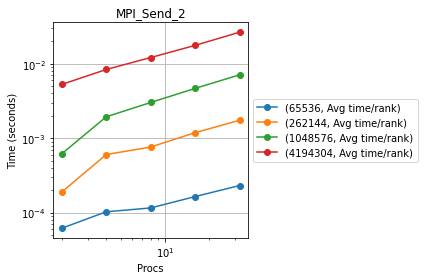

<Figure size 1440x1440 with 0 Axes>

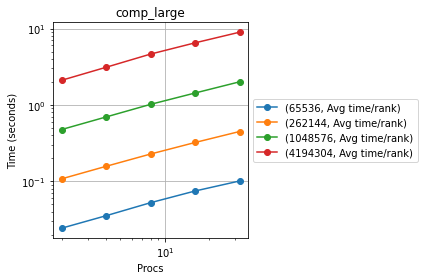

<Figure size 1440x1440 with 0 Axes>

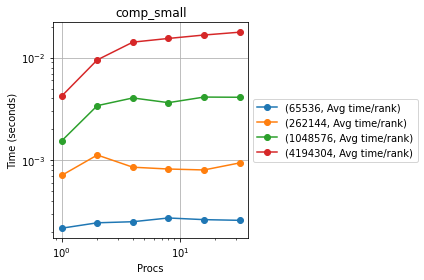

<Figure size 1440x1440 with 0 Axes>

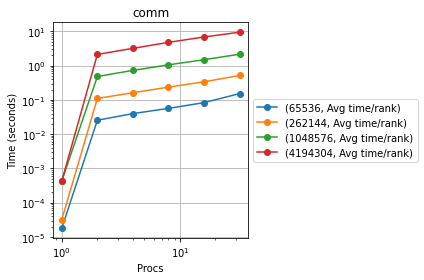

<Figure size 1440x1440 with 0 Axes>

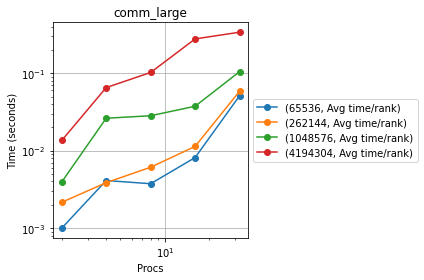

<Figure size 1440x1440 with 0 Axes>

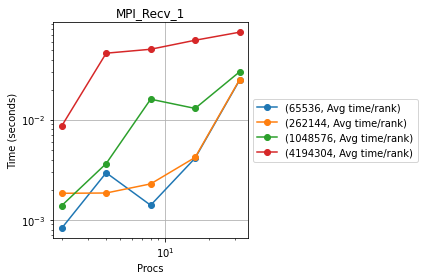

<Figure size 1440x1440 with 0 Axes>

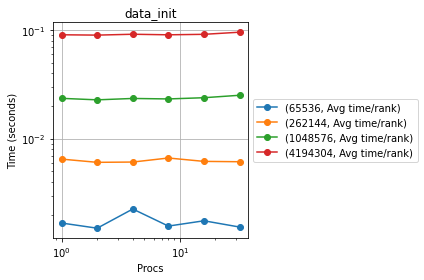

<Figure size 1440x1440 with 0 Axes>

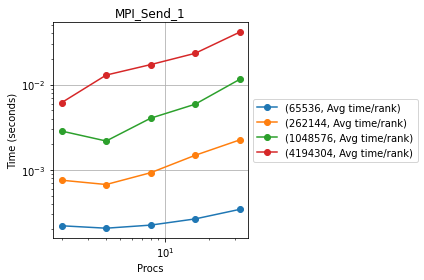

<Figure size 1440x1440 with 0 Axes>

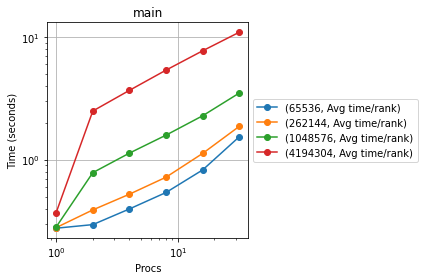

<Figure size 1440x1440 with 0 Axes>

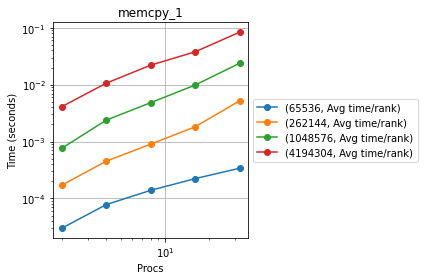

<Figure size 1440x1440 with 0 Axes>

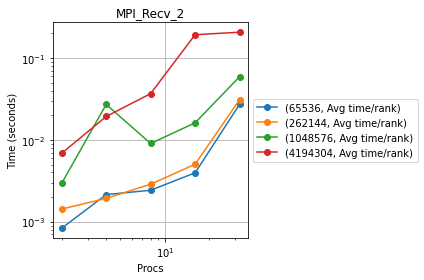

In [32]:
# for matrix in matrix_sizes:
    
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Procs",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()

In [33]:
ctk.dataframe

65536        262144       1048576       4194304
                     Avg time/rank Avg time/rank Avg time/rank Avg time/rank
name       num_procs                                                        
main       1              0.276869      0.279950      0.283464      0.371513
           2              0.296116      0.390218      0.784919      2.494643
           4              0.397319      0.524094      1.132858      3.676469
           8              0.541295      0.721027      1.587328      5.375710
           16             0.826520      1.126467      2.283063      7.724570
           32             1.539997      1.872272      3.496874     10.944460
comm       1              0.000018      0.000032      0.000431      0.000429
           2              0.025495      0.110501      0.481867      2.122174
           4              0.039829      0.162120      0.726814      3.196387
           8              0.056513      0.235607      1.054397      4.776204
           16             0.083210      0.336974      1.487536      6.850964
           32             0.152787      0.516288      2.155254      9.457534
comm_large 2              0.000997      0.002151      0.003939      0.013538
           4              0.004117      0.003863      0.026238      0.065298
           8              0.003742      0.006112      0.028272      0.102338
           16             0.008148      0.011356      0.037476      0.277701
           32             0.051167      0.058573      0.104924      0.339058
MPI_Recv_1 2              0.000825      0.001842      0.001387      0.008668
           4              0.002954      0.001854      0.003649      0.046262
           8              0.001400      0.002287      0.016054      0.050640
           16             0.004139      0.004204      0.012983      0.062313
           32             0.024883      0.025160      0.030136      0.074983
MPI_Recv_2 2              0.000835      0.001431      0.002951      0.006864
           4              0.002147      0.001931      0.027092      0.019312
           8              0.002429      0.002877      0.009040      0.036748
           16             0.003965      0.005042      0.016155      0.192480
           32             0.027143      0.030983      0.059040      0.206512
MPI_Send_1 2              0.000221      0.000757      0.002856      0.006168
           4              0.000207      0.000674      0.002184      0.012973
           8              0.000225      0.000927      0.004045      0.017214
           16             0.000266      0.001484      0.005900      0.023352
           32             0.000344      0.002246      0.011537      0.041328
MPI_Send_2 2              0.000062      0.000190      0.000620      0.005293
           4              0.000103      0.000605      0.001945      0.008397
           8              0.000116      0.000763      0.003027      0.012156
           16             0.000165      0.001190      0.004683      0.017718
           32             0.000232      0.001746      0.007118      0.026615
comp_large 2              0.024192      0.107235      0.474658      2.097691
           4              0.035265      0.156548      0.694039      3.106574
           8              0.052227      0.226809      1.015081      4.626895
           16             0.074342      0.321191      1.429393      6.494919
           32             0.100521      0.447413      2.003059      8.950983
memcpy_1   2              0.000030      0.000171      0.000763      0.004111
           4              0.000078      0.000452      0.002381      0.010628
           8              0.000139      0.000901      0.004834      0.022038
           16             0.000223      0.001820      0.009857      0.037828
           32             0.000340      0.005197      0.023769      0.083701
comp_small 1              0.000217      0.000711      0.001545      0.004223
           2              0.000245      0.001123      0.003404      0.009516
           4             

## SPEEDUP


In [34]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("num_procs", axis=1).set_index("name")/ctk.dataframe

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [35]:
speedup_df

65536        262144       1048576       4194304
                     Avg time/rank Avg time/rank Avg time/rank Avg time/rank
name       num_procs                                                        
main       1              1.000000      1.000000      1.000000      1.000000
           2              0.935002      0.717419      0.361138      0.148924
           4              0.696843      0.534160      0.250220      0.101052
           8              0.511494      0.388266      0.178579      0.069110
           16             0.334982      0.248520      0.124160      0.048095
           32             0.179785      0.149524      0.081062      0.033945
comm       1              1.000000      1.000000      1.000000      1.000000
           2              0.000706      0.000290      0.000894      0.000202
           4              0.000452      0.000197      0.000593      0.000134
           8              0.000319      0.000136      0.000409      0.000090
           16             0.000216      0.000095      0.000290      0.000063
           32             0.000118      0.000062      0.000200      0.000045
comm_large 2                   NaN           NaN           NaN           NaN
           4                   NaN           NaN           NaN           NaN
           8                   NaN           NaN           NaN           NaN
           16                  NaN           NaN           NaN           NaN
           32                  NaN           NaN           NaN           NaN
MPI_Recv_1 2                   NaN           NaN           NaN           NaN
           4                   NaN           NaN           NaN           NaN
           8                   NaN           NaN           NaN           NaN
           16                  NaN           NaN           NaN           NaN
           32                  NaN           NaN           NaN           NaN
MPI_Recv_2 2                   NaN           NaN           NaN           NaN
           4                   NaN           NaN           NaN           NaN
           8                   NaN           NaN           NaN           NaN
           16                  NaN           NaN           NaN           NaN
           32                  NaN           NaN           NaN           NaN
MPI_Send_1 2                   NaN           NaN           NaN           NaN
           4                   NaN           NaN           NaN           NaN
           8                   NaN           NaN           NaN           NaN
           16                  NaN           NaN           NaN           NaN
           32                  NaN           NaN           NaN           NaN
MPI_Send_2 2                   NaN           NaN           NaN           NaN
           4                   NaN           NaN           NaN           NaN
           8                   NaN           NaN           NaN           NaN
           16                  NaN           NaN           NaN           NaN
           32                  NaN           NaN           NaN           NaN
comp_large 2                   NaN           NaN           NaN           NaN
           4                   NaN           NaN           NaN           NaN
           8                   NaN           NaN           NaN           NaN
           16                  NaN           NaN           NaN           NaN
           32                  NaN           NaN           NaN           NaN
memcpy_1   2                   NaN           NaN           NaN           NaN
           4                   NaN           NaN           NaN           NaN
           8                   NaN           NaN           NaN           NaN
           16                  NaN           NaN           NaN           NaN
           32                  NaN           NaN           NaN           NaN
comp_small 1              1.000000      1.000000      1.000000      1.000000
           2              0.885714      0.633126      0.453878      0.443779
           4             

In [36]:
speedup_df.dropna()

65536        262144       1048576       4194304
                     Avg time/rank Avg time/rank Avg time/rank Avg time/rank
name       num_procs                                                        
main       1              1.000000      1.000000      1.000000      1.000000
           2              0.935002      0.717419      0.361138      0.148924
           4              0.696843      0.534160      0.250220      0.101052
           8              0.511494      0.388266      0.178579      0.069110
           16             0.334982      0.248520      0.124160      0.048095
           32             0.179785      0.149524      0.081062      0.033945
comm       1              1.000000      1.000000      1.000000      1.000000
           2              0.000706      0.000290      0.000894      0.000202
           4              0.000452      0.000197      0.000593      0.000134
           8              0.000319      0.000136      0.000409      0.000090
           16             0.000216      0.000095      0.000290      0.000063
           32             0.000118      0.000062      0.000200      0.000045
comp_small 1              1.000000      1.000000      1.000000      1.000000
           2              0.885714      0.633126      0.453878      0.443779
           4              0.864542      0.832553      0.381764      0.297835
           8              0.794872      0.867073      0.424334      0.274114
           16             0.825095      0.885430      0.374273      0.253862
           32             0.837838      0.756383      0.375912      0.238265
data_init  1              1.000000      1.000000      1.000000      1.000000
           2              1.115691      1.070675      1.032223      1.007199
           4              0.743136      1.064189      1.002341      0.988835
           8              1.066751      0.976853      1.012601      1.000575
           16             0.953409      1.049241      0.986715      0.990415
           32             1.088903      1.057092      0.936928      0.946870

/tmp/job.9363299/ipykernel_8165/3784324337.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


<Figure size 1440x1440 with 0 Axes>

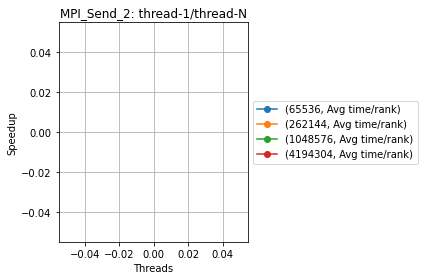

<Figure size 1440x1440 with 0 Axes>

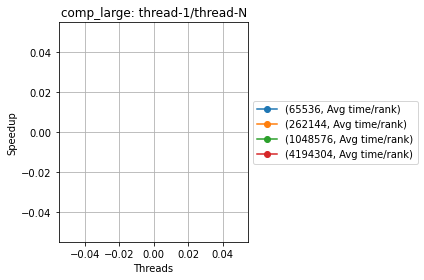

<Figure size 1440x1440 with 0 Axes>

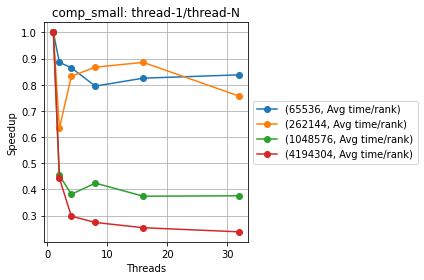

<Figure size 1440x1440 with 0 Axes>

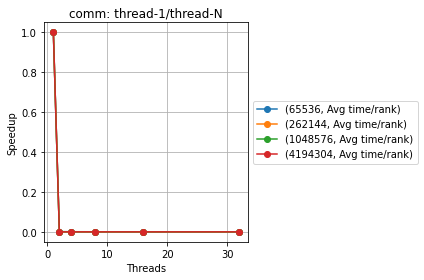

<Figure size 1440x1440 with 0 Axes>

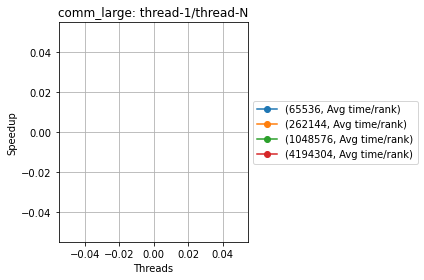

<Figure size 1440x1440 with 0 Axes>

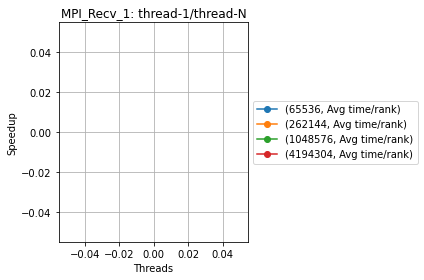

<Figure size 1440x1440 with 0 Axes>

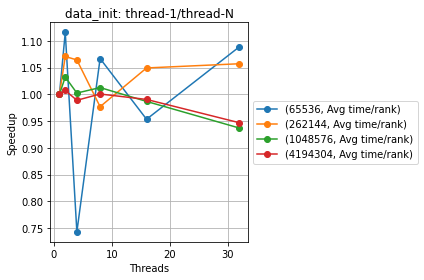

<Figure size 1440x1440 with 0 Axes>

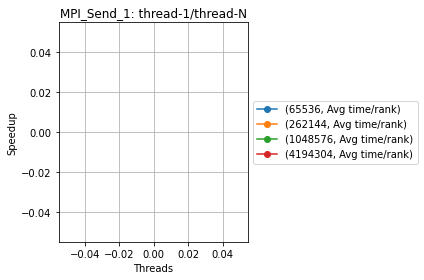

<Figure size 1440x1440 with 0 Axes>

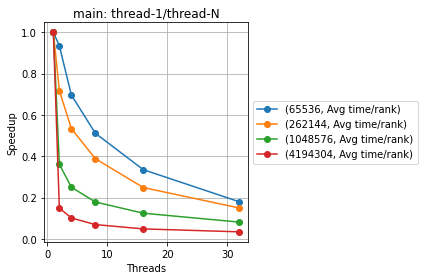

<Figure size 1440x1440 with 0 Axes>

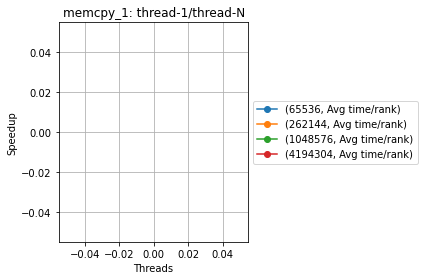

<Figure size 1440x1440 with 0 Axes>

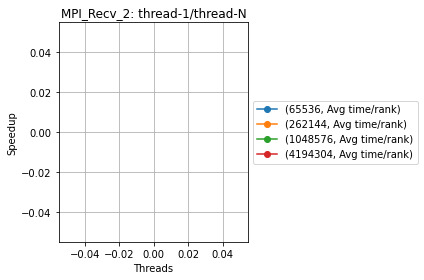

In [37]:
for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

## STRONG SCALING

In [38]:
# increase the nummber of threads but dont increase the array size

In [39]:
beans = ctk.dataframe
beans = beans.reset_index().drop([(262144), (1048576), (4194304)], axis=1)
beans = beans.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

beans


/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


65536
                     Avg time/rank
name       num_procs              
main       1              0.276869
           2              0.296116
           4              0.397319
           8              0.541295
           16             0.826520
           32             1.539997
comm       1              0.000018
           2              0.025495
           4              0.039829
           8              0.056513
           16             0.083210
           32             0.152787
comm_large 2              0.000997
           4              0.004117
           8              0.003742
           16             0.008148
           32             0.051167
MPI_Recv_1 2              0.000825
           4              0.002954
           8              0.001400
           16             0.004139
           32             0.024883
MPI_Recv_2 2              0.000835
           4              0.002147
           8              0.002429
           16             0.003965
           32             0.027143
MPI_Send_1 2              0.000221
           4              0.000207
           8              0.000225
           16             0.000266
           32             0.000344
MPI_Send_2 2              0.000062
           4              0.000103
           8              0.000116
           16             0.000165
           32             0.000232
comp_large 2              0.024192
           4              0.035265
           8              0.052227
           16             0.074342
           32             0.100521
memcpy_1   2              0.000030
           4              0.000078
           8              0.000139
           16             0.000223
           32             0.000340
comp_small 1              0.000217
           2              0.000245
           4              0.000251
           8              0.000273
           16             0.000263
           32             0.000259
data_init  1              0.001678
           2              0.001504
           4              0.002258
           8              0.001573
           16             0.001760
           32             0.001541

<Figure size 1440x1440 with 0 Axes>

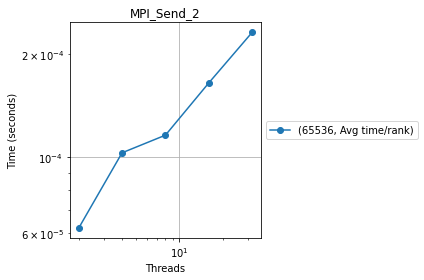

<Figure size 1440x1440 with 0 Axes>

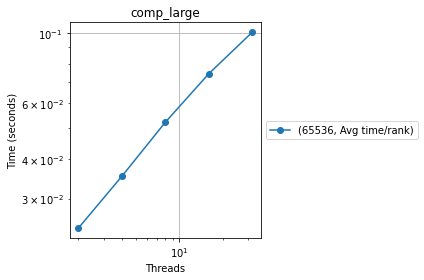

<Figure size 1440x1440 with 0 Axes>

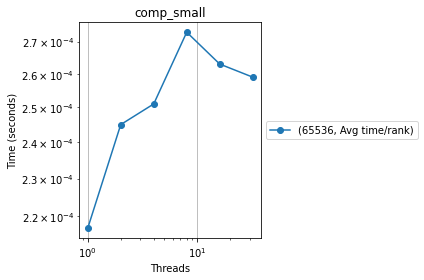

<Figure size 1440x1440 with 0 Axes>

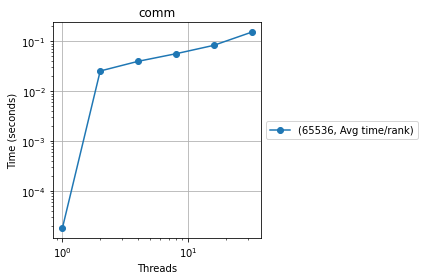

<Figure size 1440x1440 with 0 Axes>

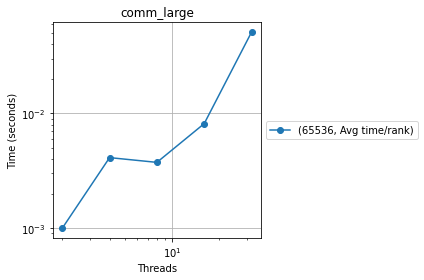

<Figure size 1440x1440 with 0 Axes>

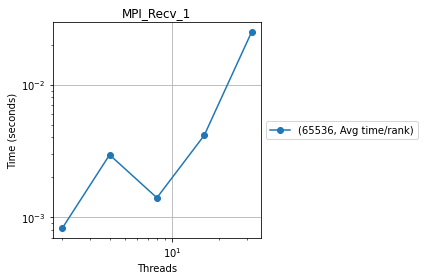

<Figure size 1440x1440 with 0 Axes>

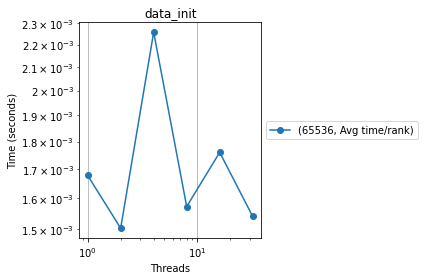

<Figure size 1440x1440 with 0 Axes>

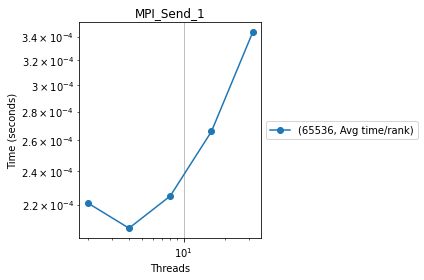

<Figure size 1440x1440 with 0 Axes>

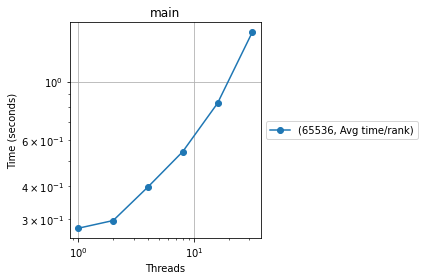

<Figure size 1440x1440 with 0 Axes>

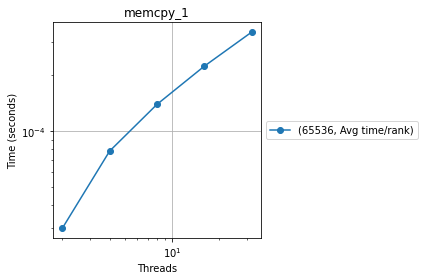

<Figure size 1440x1440 with 0 Axes>

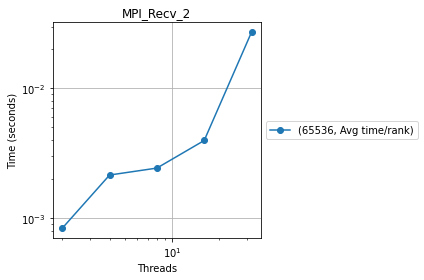

In [40]:
for name in function_names:
    plot_pandas(
        df=beans.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()

In [14]:
df = ctk.dataframe

In [15]:
df.shape

(28, 25)

In [17]:
df.to_csv('rawData.csv', index=False)

In [99]:
df.columns

MultiIndex([(  65536,           'nid'),
            (  65536,  'spot.channel'),
            (  65536, 'Min time/rank'),
            (  65536, 'Max time/rank'),
            (  65536, 'Avg time/rank'),
            (  65536,    'Total time'),
            ( 262144,           'nid'),
            ( 262144,  'spot.channel'),
            ( 262144, 'Min time/rank'),
            ( 262144, 'Max time/rank'),
            ( 262144, 'Avg time/rank'),
            ( 262144,    'Total time'),
            (1048576,           'nid'),
            (1048576,  'spot.channel'),
            (1048576, 'Min time/rank'),
            (1048576, 'Max time/rank'),
            (1048576, 'Avg time/rank'),
            (1048576,    'Total time'),
            (4194304,           'nid'),
            (4194304,  'spot.channel'),
            (4194304, 'Min time/rank'),
            (4194304, 'Max time/rank'),
            (4194304, 'Avg time/rank'),
            (4194304,    'Total time'),
            ( 'name',              '')],

In [102]:
# df1 = df[['65536','262144','1048576','4194304']]
# df1

input_sizes = df.columns.levels[0]
input_sizes

Index([65536, 262144, 1048576, 4194304, 'name'], dtype='object')

In [106]:
# Now, create a dictionary to hold your DataFrames
dfs = {}

# Loop through each input size and create a new DataFrame for each
for input_size in input_sizes:
    if input_size != 'name':  # We will deal with the 'name' column separately
        # Select columns for the current input size
        columns_to_select = [col for col in df.columns if col[0] == input_size]
        # Create a new DataFrame with these columns
        dfs[input_size] = df[columns_to_select].copy()

# The 'name' column seems to be a separate category that doesn't fit with the input sizes
# We will add it to each DataFrame separately
for input_size_df in dfs.values():
    input_size_df[('name', '')] = df[('name', '')]

# Now, dfs is a dictionary with input sizes as keys and the corresponding DataFrames as values
# For example, to access the DataFrame for input size 65536:
df_65536 = dfs[65536]
df_262144 = dfs[262144]
df_1048576 = dfs[1048576]
df_4194304 = dfs[4194304]

In [104]:
df_65536

65536                 \
                                                           nid   spot.channel   
node                                         num_threads                        
{'name': 'main', 'type': 'function'}         64              1  regionprofile   
                                             128             1  regionprofile   
                                             256             1  regionprofile   
                                             512             1  regionprofile   
{'name': 'comm', 'type': 'function'}         64              3  regionprofile   
                                             128             3  regionprofile   
                                             256             3  regionprofile   
                                             512             3  regionprofile   
{'name': 'comm_large', 'type': 'function'}   64              4  regionprofile   
                                             128             4  regionprofile   
                                             256             4  regionprofile   
                                             512             4  regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64              5  regionprofile   
                                             128             5  regionprofile   
                                             256             5  regionprofile   
                                             512             5  regionprofile   
{'name': 'comp', 'type': 'function'}         64              6  regionprofile   
                                             128             6  regionprofile   
                                             256             6  regionprofile   
                                             512             6  regionprofile   
{'name': 'comp_large', 'type': 'function'}   64              7  regionprofile   
                                             128             7  regionprofile   
                                             256             7  regionprofile   
                                             512             7  regionprofile   
{'name': 'data_init', 'type': 'function'}    64              2  regionprofile   
                                             128             2  regionprofile   
                                             256             2  regionprofile   
                                             512             2  regionprofile   

                                                                        \
                                                         Min time/rank   
node                                         num_threads                 
{'name': 'main', 'type': 'function'}         64               0.495571   
                                             128              0.465160   
                                             256              0.604006   
                                             512              0.609716   
{'name': 'comm', 'type': 'function'}         64               0.000164   
                                             128              0.000186   
                                             256              0.000151   
                                             512              0.000134   
{'name': 'comm_large', 'type': 'function'}   64               0.000130   
                                             128              0.000153   
                                             256              0.000118   
                                             512              0.000108   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64               0.000115   
                                             128              0.000137   
                                             256              0.000103   
                                             512              0.000094   
{'name': 'comp', 'type': 'function'}         64               0.000451   
                                             128              0.0

In [107]:
df_262144

262144  \
                                                            nid   
node                                         num_threads          
{'name': 'main', 'type': 'function'}         64               1   
                                             128              1   
                                             256              1   
                                             512              1   
{'name': 'comm', 'type': 'function'}         64               3   
                                             128              3   
                                             256              3   
                                             512              3   
{'name': 'comm_large', 'type': 'function'}   64               4   
                                             128              4   
                                             256              4   
                                             512              4   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64               5   
                                             128              5   
                                             256              5   
                                             512              5   
{'name': 'comp', 'type': 'function'}         64               6   
                                             128              6   
                                             256              6   
                                             512              6   
{'name': 'comp_large', 'type': 'function'}   64               7   
                                             128              7   
                                             256              7   
                                             512              7   
{'name': 'data_init', 'type': 'function'}    64               2   
                                             128              2   
                                             256              2   
                                             512              2   

                                                                         \
                                                           spot.channel   
node                                         num_threads                  
{'name': 'main', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                             

In [108]:
df_1048576

1048576  \
                                                             nid   
node                                         num_threads           
{'name': 'main', 'type': 'function'}         64                1   
                                             128               1   
                                             256               1   
                                             512               1   
{'name': 'comm', 'type': 'function'}         64                3   
                                             128               3   
                                             256               3   
                                             512               3   
{'name': 'comm_large', 'type': 'function'}   64                4   
                                             128               4   
                                             256               4   
                                             512               4   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64                5   
                                             128               5   
                                             256               5   
                                             512               5   
{'name': 'comp', 'type': 'function'}         64                6   
                                             128               6   
                                             256               6   
                                             512               6   
{'name': 'comp_large', 'type': 'function'}   64                7   
                                             128               7   
                                             256               7   
                                             512               7   
{'name': 'data_init', 'type': 'function'}    64                2   
                                             128               2   
                                             256               2   
                                             512               2   

                                                                         \
                                                           spot.channel   
node                                         num_threads                  
{'name': 'main', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile  

In [109]:
df_4194304

4194304  \
                                                             nid   
node                                         num_threads           
{'name': 'main', 'type': 'function'}         64                1   
                                             128               1   
                                             256               1   
                                             512               1   
{'name': 'comm', 'type': 'function'}         64                3   
                                             128               3   
                                             256               3   
                                             512               3   
{'name': 'comm_large', 'type': 'function'}   64                4   
                                             128               4   
                                             256               4   
                                             512               4   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64                5   
                                             128               5   
                                             256               5   
                                             512               5   
{'name': 'comp', 'type': 'function'}         64                6   
                                             128               6   
                                             256               6   
                                             512               6   
{'name': 'comp_large', 'type': 'function'}   64                7   
                                             128               7   
                                             256               7   
                                             512               7   
{'name': 'data_init', 'type': 'function'}    64                2   
                                             128               2   
                                             256               2   
                                             512               2   

                                                                         \
                                                           spot.channel   
node                                         num_threads                  
{'name': 'main', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comm_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'cudaMemcpy_1', 'type': 'function'} 64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp', 'type': 'function'}         64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile   
                                             512          regionprofile   
{'name': 'comp_large', 'type': 'function'}   64           regionprofile   
                                             128          regionprofile   
                                             256          regionprofile  

In [114]:
# # Define common variables
# function_names = set(ctk.dataframe.index.get_level_values("name"))
# threads = sorted(list(set(ctk.dataframe.index.get_level_values("threads"))))
# matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [118]:
df_65536.columns

MultiIndex([( 65536,           'nid'),
            ( 65536,  'spot.channel'),
            ( 65536, 'Min time/rank'),
            ( 65536, 'Max time/rank'),
            ( 65536, 'Avg time/rank'),
            ( 65536,    'Total time'),
            ('name',              '')],
           )

In [134]:
print(df_65536.columns.levels)  # This will show all levels in the MultiIndex
print(df_65536.columns.names)  

[[65536, 262144, 1048576, 4194304, 'name'], ['Avg time/rank', 'Max time/rank', 'Min time/rank', 'Total time', 'name', 'nid', 'spot.channel', '']]
[None, None]


In [139]:
# print(df_65536.index.unique(1))

Int64Index([64, 128, 256, 512], dtype='int64', name='num_threads')


In [141]:
# Filtering rows where the second level of the MultiIndex is 'name' and its corresponding value is 'main'
filtered_df_65536 = df_65536[df_65536.index.get_level_values(1) == 'name']
filtered_df_65536.shape

(0, 7)

In [144]:
df1_fin = df_65536.head(4)
df1_fin

65536                 \
                                                   nid   spot.channel   
node                                 num_threads                        
{'name': 'main', 'type': 'function'} 64              1  regionprofile   
                                     128             1  regionprofile   
                                     256             1  regionprofile   
                                     512             1  regionprofile   

                                                                              \
                                                 Min time/rank Max time/rank   
node                                 num_threads                               
{'name': 'main', 'type': 'function'} 64               0.495571      0.495571   
                                     128              0.465160      0.465160   
                                     256              0.604006      0.604006   
                                     512              0.609716      0.609716   

                                                                           \
                                                 Avg time/rank Total time   
node                                 num_threads                            
{'name': 'main', 'type': 'function'} 64               0.495571   0.495571   
                                     128              0.465160   0.465160   
                                     256              0.604006   0.604006   
                                     512              0.609716   0.609716   

                                                  name  
                                                        
node                                 num_threads        
{'name': 'main', 'type': 'function'} 64           main  
                                     128          main  
                                     256          main  
                                     512          main

In [146]:
df1_fin.columns

MultiIndex([( 65536,           'nid'),
            ( 65536,  'spot.channel'),
            ( 65536, 'Min time/rank'),
            ( 65536, 'Max time/rank'),
            ( 65536, 'Avg time/rank'),
            ( 65536,    'Total time'),
            ('name',              '')],
           )

In [145]:
plt.scatter(df1_fin['num_threads'], df1_fin['Avg time/rank'])
plt.xlabel('Number of Threads')
plt.ylabel('Average Time per Rank')
plt.title('Average Time per Rank vs. Number of Threads')
plt.show()

KeyError: 'num_threads'

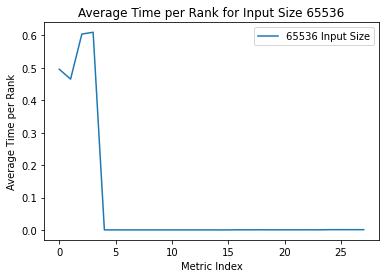

In [125]:
import matplotlib.pyplot as plt

avg_time_data = df_65536.xs('Avg time/rank', level=1, axis=1)

# plt.plot(range(len(avg_time_data)), avg_time_data.iloc[:, 0], label='65536 Input Size')
plt.title('Average Time per Rank for Input Size 65536')
plt.xlabel('Metric Index')
plt.ylabel('Average Time per Rank')
plt.legend()
plt.show()

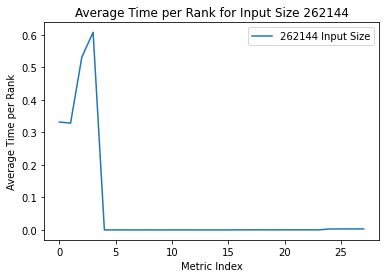

In [128]:
avg_time_data_262144 = df_262144.xs('Avg time/rank', level=1, axis=1)

plt.plot(range(len(avg_time_data_262144)), avg_time_data_262144.iloc[:, 0], label='262144 Input Size')
plt.title('Average Time per Rank for Input Size 262144')
plt.xlabel('Metric Index')
plt.ylabel('Average Time per Rank')
plt.legend()
plt.show()

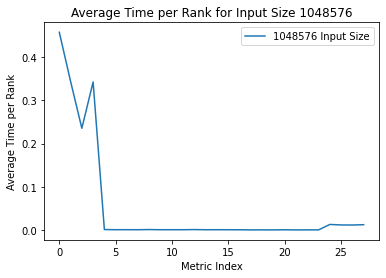

In [129]:
avg_time_data_1048576 = df_1048576.xs('Avg time/rank', level=1, axis=1)

plt.plot(range(len(avg_time_data_1048576)), avg_time_data_1048576.iloc[:, 0], label='1048576 Input Size')
plt.title('Average Time per Rank for Input Size 1048576')
plt.xlabel('Metric Index')
plt.ylabel('Average Time per Rank')
plt.legend()
plt.show()

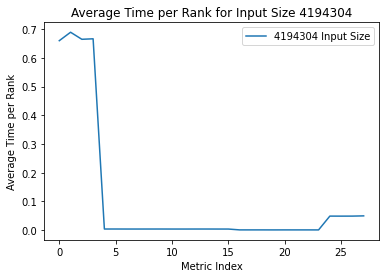

In [130]:
avg_time_data_4194304 = df_4194304.xs('Avg time/rank', level=1, axis=1)

plt.plot(range(len(avg_time_data_4194304)), avg_time_data_4194304.iloc[:, 0], label='4194304 Input Size')
plt.title('Average Time per Rank for Input Size 4194304')
plt.xlabel('Metric Index')
plt.ylabel('Average Time per Rank')
plt.legend()
plt.show()

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [111]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [12]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [13]:
ctk.dataframe.loc["main"]

,128,1024,4096
threads,,,
1,0.000270,0.000257,0.000367
2,0.000247,0.000284,0.000406
4,0.000256,0.000260,0.000374
8,0.000241,0.000278,0.000357
16,0.000262,0.000284,0.000356
32,0.000264,0.000264,0.000373
64,0.000256,0.000284,0.000453
96,0.000253,0.000305,0.000417
128,0.000287,0.000284,0.000414


In [112]:
for name in function_names:
    plot_pandas(
        df=df_65536,
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

NameError: name 'function_names' is not defined

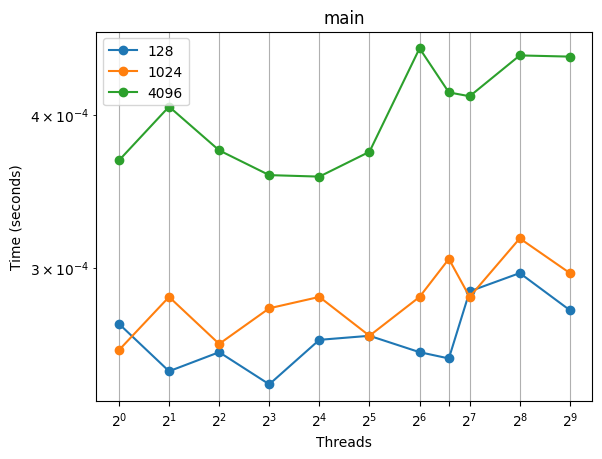

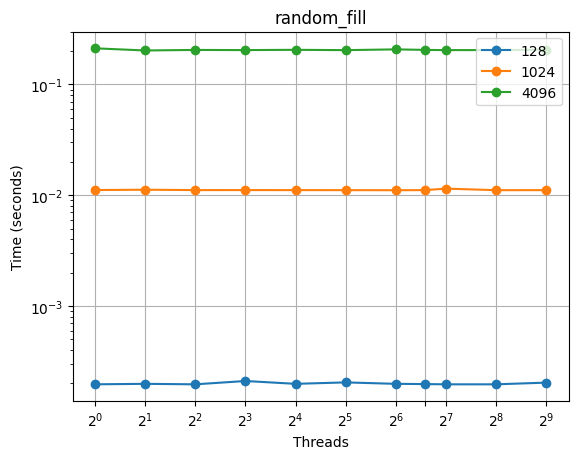

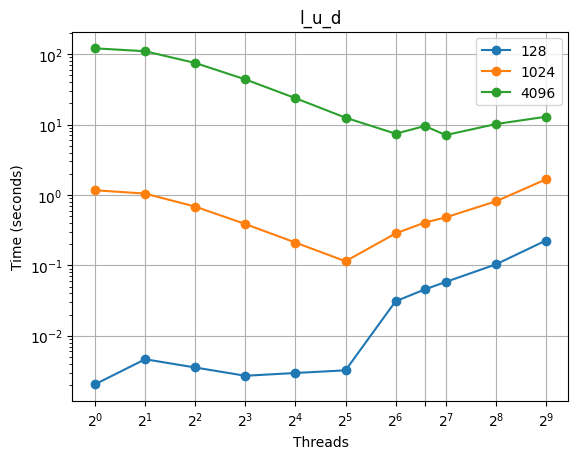

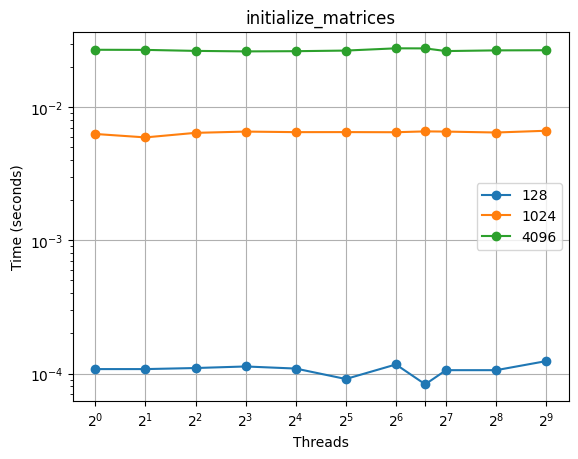

In [15]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
    )

## Speedup

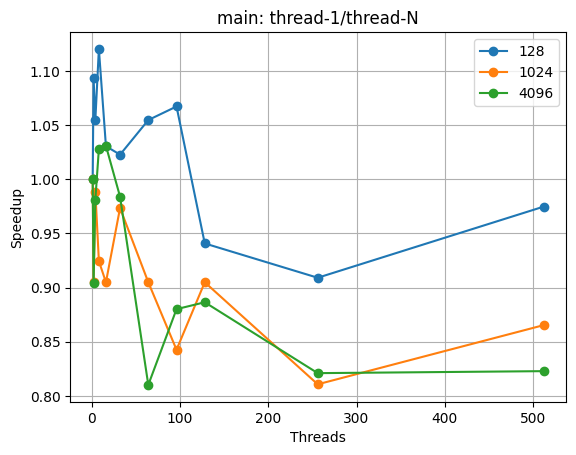

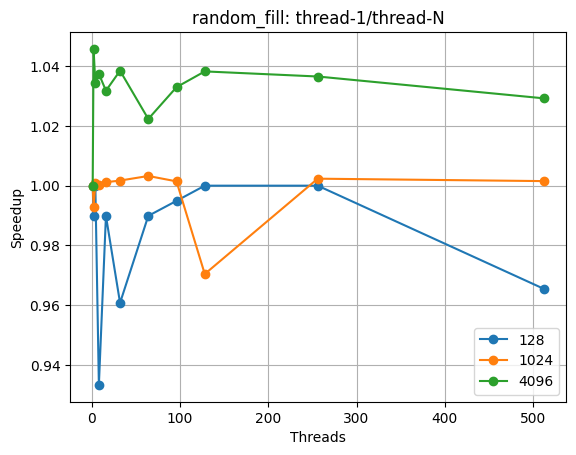

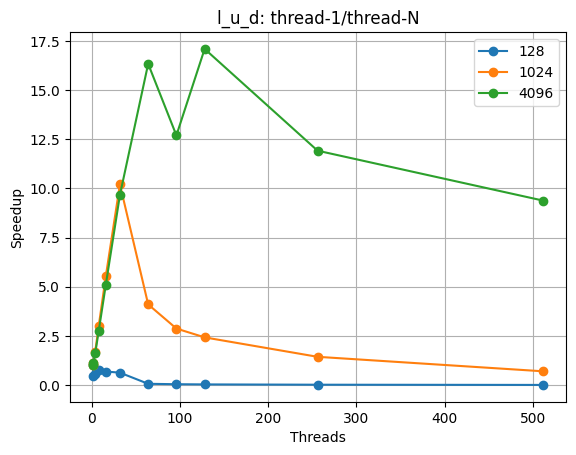

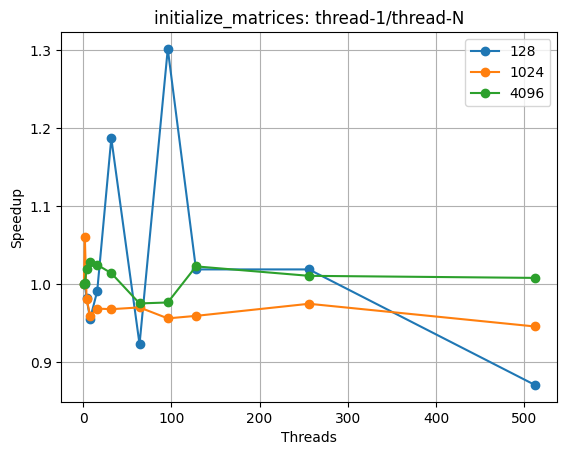

In [16]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )